In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('../Dataset/spam.csv', encoding ='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [108]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
1233,ham,Lol ok. I'll snatch her purse too.
3444,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
4587,ham,I wanted to wish you a Happy New Year and I wa...
5033,ham,I want to go to perumbavoor
4964,ham,"A few people are at the game, I'm at the mall ..."


In [109]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [110]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [111]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [112]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_14388\1692644063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
import nltk
nltk.download('punkt')
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)) )
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)) )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\hp\AppData\Local\Temp\ipykernel_14388\487045786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\hp\AppData\Local\Temp\ipykernel_14388\487045786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)) )
C:\Users\hp\AppData\Local\T

In [114]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [115]:
df[df['target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


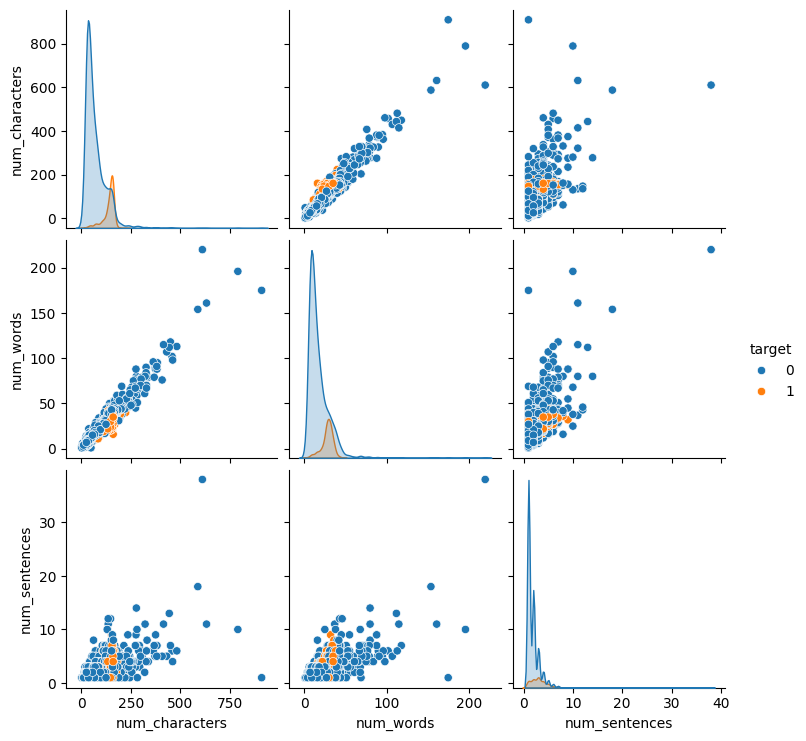

In [116]:
sns.pairplot(df,hue='target')

**Data Preprocessing**

In [117]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
def transform_text(text):
    cleaned_text = text.lower()
    
    tokens = nltk.word_tokenize(cleaned_text)
    
    tokens = [token for token in tokens if token.isalnum()]

    stop_words = set(stopwords.words('english'))
    
    tokens = [token for token in tokens if token not in stop_words]
    
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    
    cleaned_text = " ".join(stemmed_tokens)
    return cleaned_text

In [118]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\hp\AppData\Local\Temp\ipykernel_14388\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [119]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


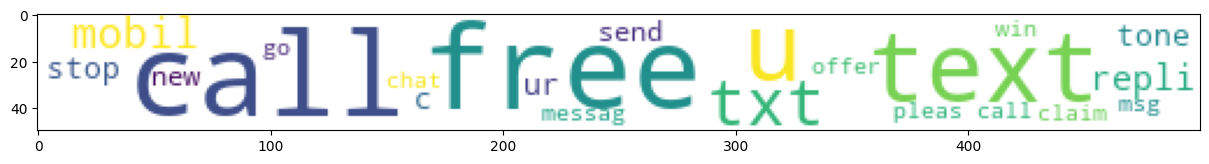

In [120]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=50,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

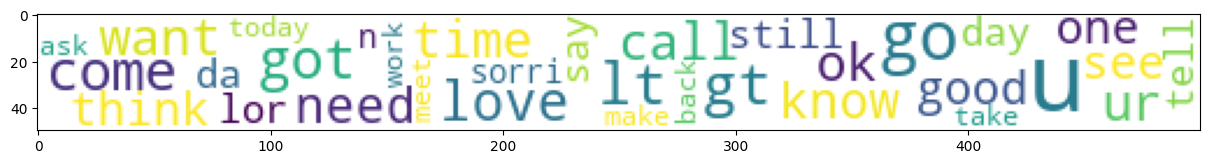

In [121]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [122]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [128]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import pickle

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [129]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [131]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[788 108]
 [ 27 111]]
0.5068493150684932


In [132]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [134]:
clfs = {
    'SVM' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc
}

In [135]:
param_grids = {
    'SVM': {'kernel': ['linear', 'sigmoid'], 'gamma': [0.1, 1]},
    'KN': {'n_neighbors': [3, 5, 7]},
    'NB': {'alpha': [0.5, 1.0, 1.5]},
    'DT': {'max_depth': [3, 5, 7]},
    'LR': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
}

# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [136]:
def model_performance(clfs, param_grids, X_train, y_train, X_test, y_test):
    results = []
    for name, clf in clfs.items():
        print(f"Training {name}...")
        param_grid = param_grids[name]
        grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_
        
        # Fit the best classifier with training data
        best_clf.fit(X_train, y_train)
        
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        results.append({
            'Model': name,
            'Best Parameters': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision
        })
    return results

In [137]:
results = model_performance(clfs,param_grids, X_train, y_train, X_test, y_test)
print(results)

Training SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training KN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training NB...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training DT...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training LR...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[{'Model': 'SVM', 'Best Parameters': {'gamma': 0.1, 'kernel': 'linear'}, 'Accuracy': 0.9787234042553191, 'Precision': 0.9786652714800603}, {'Model': 'KN', 'Best Parameters': {'n_neighbors': 3}, 'Accuracy': 0.9177949709864603, 'Precision': 0.9249177308907935}, {'Model': 'NB', 'Best Parameters': {'alpha': 0.5}, 'Accuracy': 0.9777562862669246, 'Precision': 0.9777088114916305}, {'Model': 'DT', 'Best Parameters': {'max_depth': 7}, 'Accuracy': 0.9400386847195358, 'Precision': 0.9371816598966086}, {'Model': 'LR', 'Best Parameters': {'C': 10, 'penalty': 'l2'}, 'Accuracy': 0.9738878143133463, 'Precision': 0.9738986042380552}]

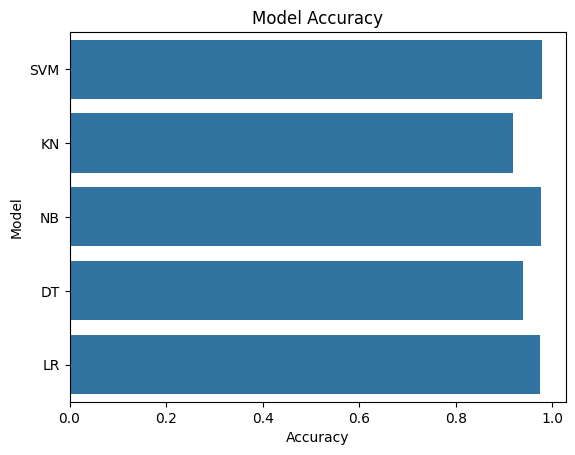

In [138]:
results_df = pd.DataFrame(results)

# Plotting
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Accuracy')
plt.show()

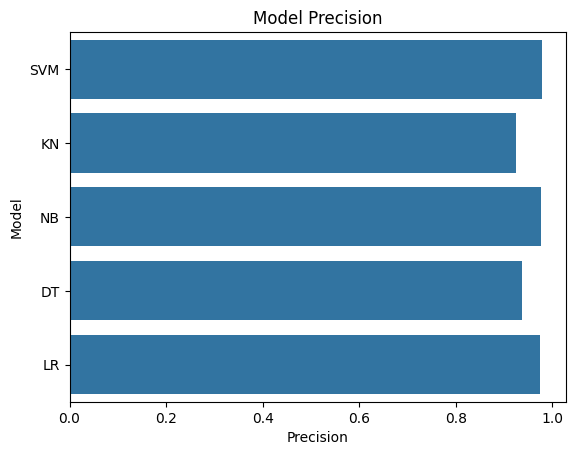

In [139]:
results_df = pd.DataFrame(results)

# Plotting
sns.barplot(x='Precision', y='Model', data=results_df)
plt.title('Model Precision')
plt.show()

we will use the SVM model because of the accuracy and precision of 98% 

In [140]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

# Evaluate the performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
print("SVM Accuracy:", accuracy_svc)
print("SVM Precision:", precision_svc)

SVM Accuracy: 0.9787234042553191
SVM Precision: 0.9786652714800603


In [144]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))

In [147]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [150]:
def predict_spam(input_text, model, tfidf):
    cleaned_text = transform_text(input_text)
    vector_input = tfidf.transform([cleaned_text]).toarray()  # Convert sparse matrix to dense array
    prediction = model.predict(vector_input)[0]
    return "Spam" if prediction == 1 else "Not Spam"

In [151]:
input_text = "Get a free gift now!"
prediction = predict_spam(input_text, model, tfidf)
print("Prediction:", prediction)


Prediction: Not Spam


In [ ]:
import pickle

filename = 'svc_model.pkl'

# Open a file in write-binary mode and dump the model
with open(filename, 'wb') as file:
    pickle.dump(svc, file)

print(f"Model saved to {filename}")
